## Доверительные интервалы для среднего

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('d:\Aleh_Darashenka\Projects\Coursera\Machine Learning\\4.Statistics\Week1\water.csv')

In [5]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


### Доверительные интервалы для среднегодовой смертности

In [10]:
mort_mean = data['mortality'].mean()

In [14]:
mort_std = data['mortality'].std(ddof=1)/np.sqrt(data.shape[0])

In [17]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

print " mean 95%% confidence interval", _tconfint_generic(mort_mean, mort_std,
                                                                       data.shape[0] - 1,
                                                                       0.05, 'two-sided')

  mean 95%% confidence interval (1476.0833413552848, 1572.2117406119285)


In [25]:
mort_mean_sth = data[data.location=='South'].mortality.mean()
mort_std_sth = data[data.location=='South'].mortality.std(ddof=1)/np.sqrt(data[data.location=='South'].shape[0])
print " mean 95%% confidence interval", _tconfint_generic(mort_mean_sth, mort_std_sth,
                                                                       data[data.location=='South'].shape[0] - 1,
                                                                       0.05, 'two-sided')

 mean 95%% confidence interval (1320.1517462936238, 1433.463638321761)


In [24]:
data[data.location=='South'].mortality.mean()

1376.8076923076924

In [26]:
mort_mean_nth = data[data.location=='North'].mortality.mean()
mort_std_nth = data[data.location=='North'].mortality.std(ddof=1)/np.sqrt(data[data.location=='North'].shape[0])
print " mean 95%% confidence interval", _tconfint_generic(mort_mean_nth, mort_std_nth,
                                                                       data[data.location=='North'].shape[0] - 1,
                                                                       0.05, 'two-sided')

 mean 95%% confidence interval (1586.5605251961385, 1680.6394748038613)


### Доверительные интервалы для средней жесткости воды


In [27]:
mort_mean_sth = data[data.location=='South'].hardness.mean()
mort_std_sth = data[data.location=='South'].hardness.std(ddof=1)/np.sqrt(data[data.location=='South'].shape[0])
print " mean 95%% confidence interval", _tconfint_generic(mort_mean_sth, mort_std_sth,
                                                                       data[data.location=='South'].shape[0] - 1,
                                                                       0.05, 'two-sided')

 mean 95%% confidence interval (53.467198692036106, 86.071262846425441)


In [28]:
mort_mean_nth = data[data.location=='North'].hardness.mean()
mort_std_nth = data[data.location=='North'].hardness.std(ddof=1)/np.sqrt(data[data.location=='North'].shape[0])
print " mean 95%% confidence interval", _tconfint_generic(mort_mean_nth, mort_std_nth,
                                                                       data[data.location=='North'].shape[0] - 1,
                                                                       0.05, 'two-sided')

 mean 95%% confidence interval (21.422487285724259, 39.377512714275738)


In [ ]:
from statsmodels.stats.proportion import samplesize_confint_proportion
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
print n_samples

## Доверительные интервалы для долей

In [29]:
from statsmodels.stats.proportion import proportion_confint
import numpy as np

In [30]:
data1 = np.zeros(50)

In [32]:
data1[1] = 1

In [34]:
normal_interval = proportion_confint(sum(data1), len(data1), method = 'normal')

In [35]:
normal_interval

(-0.018805307081790987, 0.058805307081790992)

In [38]:
wilson_interval = proportion_confint(sum(data1), len(data1), method = 'wilson')

In [39]:
wilson_interval

(0.0035392592716462362, 0.10495443589637815)

In [40]:
from statsmodels.stats.proportion import samplesize_confint_proportion
n_samples = int(np.ceil(samplesize_confint_proportion(data1.mean(), 0.01)))

In [41]:
n_samples

753

9604


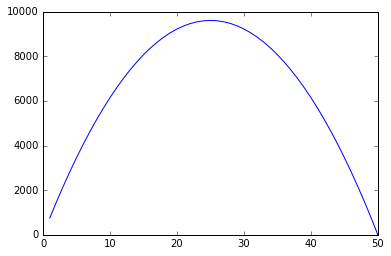

In [50]:
from matplotlib import pyplot as plt
%matplotlib inline

data2 = np.zeros(50)
n_samples2 = []
for i in range(50):
    data2[i]=1
    n_samples2.append( int(np.ceil(samplesize_confint_proportion(data2.mean(), 0.01))))
plt.plot(np.arange(1,51,1), n_samples2)    

print np.max(n_samples2)

In [56]:
import scipy.stats as st



In [108]:
st.norm.ppf(0.0015)

-2.9677379253417833

## Интервальные оценки для двух долей

In [75]:
aspirin = np.zeros(11037)
for i in range(104):
    aspirin[i] = 1
placebo = np.zeros(11034)
for i in range(189):
    placebo[i] = 1
#np.random.shuffle(aspirin)    
#np.random.shuffle(placebo)

In [70]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)




In [72]:
print "confidence interval: [%f, %f]" % proportions_confint_diff_ind(placebo, aspirin)

confidence interval: [0.004688, 0.010724]


In [74]:
(189./(11034-189))/(104./(11037-104))

1.8320539419087138

In [76]:
aspirin

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [103]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [104]:
np.random.seed(0)

aspirin_mean_scores = map(np.mean, get_bootstrap_samples(aspirin, 1000))
placebo_mean_scores =  map(np.mean, get_bootstrap_samples(placebo, 1000))




In [105]:
print "95% confidence interval for the aspirin mean result:",  stat_intervals(aspirin_mean_scores, 0.05)
print "95% confidence interval for the placebo mean result:",  stat_intervals(placebo_mean_scores, 0.05)
delta_median_scores = map(lambda x: (x[1]/(1-x[1])) / (x[0]/(1-x[0])), zip(ilec_median_scores, clec_median_scores))

95% confidence interval for the aspirin mean result: [ 0.00752016  0.01123494]
95% confidence interval for the placebo mean result: [ 0.01477252  0.01957586]


In [106]:
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [ 1.44419465  2.34321168]


In [107]:
(189./11034)-(104./11037)

0.0077060239760047815